In [1]:
import json
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
with open("../data/vacancies_raw.json", "r", encoding="utf-8") as f:
    raw_data = json.load(f)

In [3]:
vacancies = []
for vac in raw_data:
    salary = vac.get("salary") or {}
    area = vac.get("area") or {}
    experience = vac.get("experience") or {}
    employer = vac.get("employer") or {}
    skills = vac.get("key_skills") or []

    vacancy = {
        'name': vac.get('name'),
        'area': area.get('name'),
        'salary_from': salary.get('from'),
        'salary_to': salary.get('to'),
        'experience': experience.get('name'),
        'employer': employer.get('name'),
        'key_skills': [s.get('name') for s in skills if isinstance(s, dict) and 'name' in s]
    }
    vacancies.append(vacancy)


In [4]:
df = pd.DataFrame(vacancies)

In [7]:
print(df.head())
print(df.info())

                             name    area  salary_from  salary_to  \
0               Product Assistant  Москва     120000.0   120000.0   
1  Начальник отдела по маркетингу  Москва          NaN        NaN   
2    Frontend Разработчик (React)  Москва     150000.0   250000.0   
3   Исполнительный директор (CEO)  Москва          NaN        NaN   
4                      QA Инженер  Москва          NaN   160000.0   

           experience              employer key_skills  
0  От 1 года до 3 лет  Post Punk Publishing         []  
1       От 3 до 6 лет                 ПУЛЬС         []  
2  От 1 года до 3 лет               SolarAI         []  
3         Более 6 лет                 Novac         []  
4           Нет опыта               SolarAI         []  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         200 non-null    object 
 1   area    

In [5]:
salary_avg = df[['salary_from', 'salary_to']].mean(axis=1)
df['salary_avg'] = salary_avg

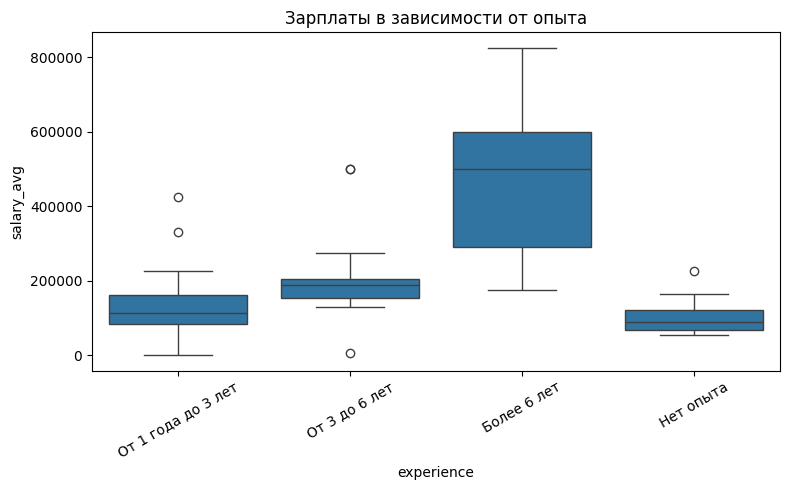

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x='experience', y='salary_avg', data=df)
plt.title('Зарплаты в зависимости от опыта')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

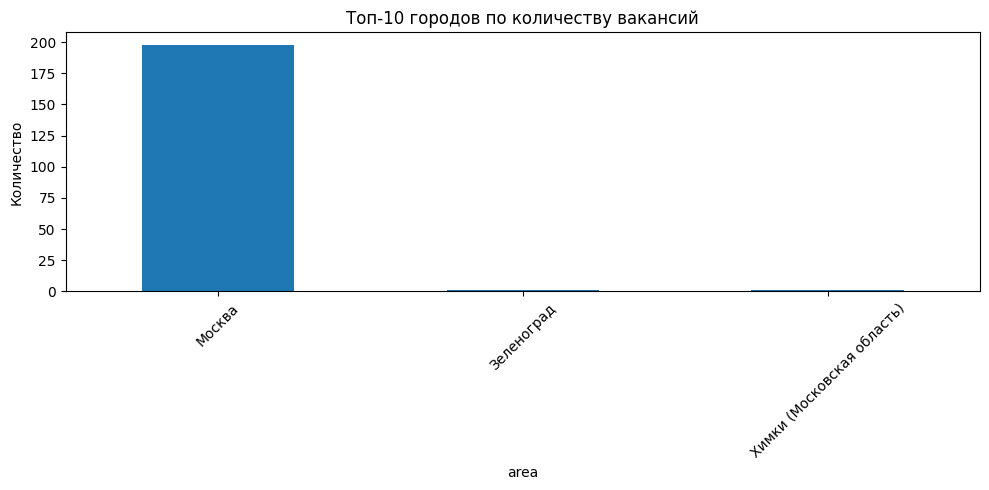

In [10]:
plt.figure(figsize=(10,5))
df['area'].value_counts().head(10).plot(kind='bar')
plt.title('Топ-10 городов по количеству вакансий')
plt.xticks(rotation=45)
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

In [6]:
all_skills = df['key_skills'].explode().dropna().tolist()

if all_skills:
    skill_text = ' '.join(all_skills)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skill_text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Часто встречающиеся навыки')
    plt.show()
else:
    print("Пустой список навыков")

Пустой список навыков
